<a href="https://colab.research.google.com/github/michpil19/scriptsForML/blob/master/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2022-05-23 08:13:36--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2022-05-23 08:13:37--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfcc97cd86e9185369441e78ec6.dl.dropboxusercontent.com/cd/0/inline/Blz6RsW-9Tsg54kNAhkNmANiEhkr2s4mMCNi83eiX292WgSjcx8c1REtR-Y1MgKYb_Oyb-GW8jFOikJvaDfzOwOhaRl1IMVCQ_V2guCPm9D_0BfXbb-UZiCpjt6tmonvRliOOTYsBKMZJEqFlDAB2vl_fjj3tX5A6CW5sYKyzB-FiA/file# [following]
--2022-05-23 08:13:37--  https://ucfcc97cd86e9185369441e78ec6.dl.dropboxusercontent.com/cd/0/inline/Blz6RsW-9Tsg54kNAhkNmANiEhkr2s4mMCNi83eiX292WgSjcx8c1REtR-Y1MgKYb_

In [2]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [4]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [6]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

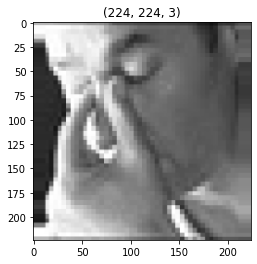

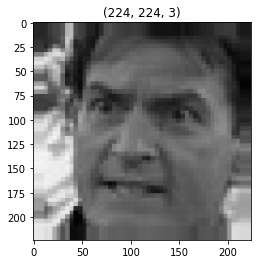

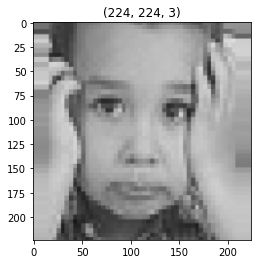

In [8]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 3:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [9]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model_test.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [10]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 40, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
10/10 [==============================] - ETA: 0s - loss: 15.2796 - accuracy: 0.2062
Epoch 1: val_accuracy improved from -inf to 0.31641, saving model to best_model_test.h5
10/10 [==============================] - 16s 431ms/step - loss: 15.2796 - accuracy: 0.2062 - val_loss: 14.0653 - val_accuracy: 0.3164
Epoch 2/40
10/10 [==============================] - ETA: 0s - loss: 8.5650 - accuracy: 0.3375
Epoch 2: val_accuracy improved from 0.31641 to 0.41016, saving model to best_model_test.h5
10/10 [==============================] - 5s 483ms/step - loss: 8.5650 - accuracy: 0.3375 - val_loss: 6.6968 - val_accuracy: 0.4102
Epoch 3/40
10/10 [==============================] - ETA: 0s - loss: 7.1756 - accuracy: 0.3500
Epoch 3: val_accuracy improved from 0.41016 to 0.44141, saving model to best_model_test.h5
10/10 [==============================] - 4s 409ms/step - loss: 7.1756 - accuracy: 0.3500 - val_loss: 4.6934 - val_accuracy: 0.4414
Epoch 4/40
10/10 [==============================] -

In [11]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model_test.h5")

In [12]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

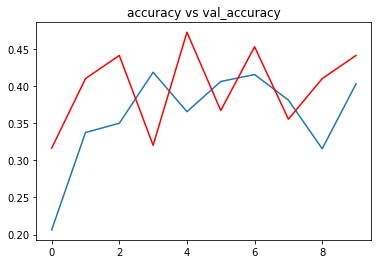

In [13]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("accuracy vs val_accuracy")
plt.show()

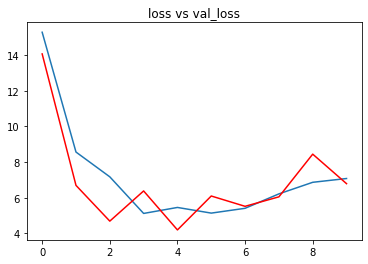

In [14]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs val_loss")
plt.show()

In [15]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [16]:
from google.colab import drive

In [17]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Outputs for myDataBase from extracted_faces_gray

In [20]:
# path for the image to see if it predics correct class
emotions = ["angry", "disgust", "fear","happy","neutral","sad","surprise"]
#path = "/content/test/happy/PrivateTest_95094.jpg"
#path = "/content/drive/MyDrive/ML_photos/hp48.jpg"
rightGuessCounter = 0
wrongGuessCounter = 0
for feeling in emotions:
  for k in range(1,13):
    path = "/content/drive/MyDrive/extracted_faces_gray/extracted_faces_gray_" + feeling + "/image"+str(k)+".jpg"
    img = load_img(path, target_size=(224,224) )

    i = img_to_array(img)/255
    input_arr = np.array([i])
    input_arr.shape

    pred = np.argmax(model.predict(input_arr))

    print("Label: " + feeling + " " + "image"+str(k)+".jpg")
    print(f"Guess: {op[pred]}")
    if feeling.__eq__(op[pred]):
      print("CORRECT")
      rightGuessCounter+=1
    else:
      print("WRONG")
      wrongGuessCounter+=1
  print()
  print()
print("Accuracy: " + str(rightGuessCounter/(rightGuessCounter+wrongGuessCounter)))
print("Total number of guesses: " + str(rightGuessCounter+wrongGuessCounter))
# to display the image  
  # plt.imshow(input_arr[0])
  # plt.title("input image")
  # plt.show()
  

Label: angry image1.jpg
Guess: neutral
WRONG
Label: angry image2.jpg
Guess: neutral
WRONG
Label: angry image3.jpg
Guess: neutral
WRONG
Label: angry image4.jpg
Guess: angry
CORRECT
Label: angry image5.jpg
Guess: neutral
WRONG
Label: angry image6.jpg
Guess: neutral
WRONG
Label: angry image7.jpg
Guess: neutral
WRONG
Label: angry image8.jpg
Guess: neutral
WRONG
Label: angry image9.jpg
Guess: neutral
WRONG
Label: angry image10.jpg
Guess: neutral
WRONG
Label: angry image11.jpg
Guess: sad
WRONG
Label: angry image12.jpg
Guess: neutral
WRONG


Label: disgust image1.jpg
Guess: neutral
WRONG
Label: disgust image2.jpg
Guess: neutral
WRONG
Label: disgust image3.jpg
Guess: neutral
WRONG
Label: disgust image4.jpg
Guess: neutral
WRONG
Label: disgust image5.jpg
Guess: neutral
WRONG
Label: disgust image6.jpg
Guess: neutral
WRONG
Label: disgust image7.jpg
Guess: neutral
WRONG
Label: disgust image8.jpg
Guess: angry
WRONG
Label: disgust image9.jpg
Guess: neutral
WRONG
Label: disgust image10.jpg
Guess: neut

#Outputs for normalisedData from stockPhotos

In [21]:
# path for the image to see if it predics correct class
emotions = ["angry", "disgust", "fear","happy","neutral","sad","surprise"]

rightGuessCounter = 0
wrongGuessCounter = 0
for feeling in emotions:
  for m in range(1,8):
    path = "/content/drive/MyDrive/normalisedData/" + feeling + "/"+str(m)+".jpg"
    img = load_img(path, target_size=(224,224) )

    i = img_to_array(img)/255
    input_arr = np.array([i])
    input_arr.shape

    pred = np.argmax(model.predict(input_arr))

    print("Label: " + feeling + " " + str(m)+".jpg")
    print(f"Guess: {op[pred]}")
    if feeling.__eq__(op[pred]):
      print("CORRECT")
      rightGuessCounter+=1
    else:
      print("WRONG")
      wrongGuessCounter+=1
  print()
  print()
print("Accuracy: " + str(rightGuessCounter/(rightGuessCounter+wrongGuessCounter)))
print("Total number of guesses: " + str(rightGuessCounter+wrongGuessCounter))
# to display the image  
  # plt.imshow(input_arr[0])
  # plt.title("input image")
  # plt.show()

Label: angry 1.jpg
Guess: angry
CORRECT
Label: angry 2.jpg
Guess: surprise
WRONG
Label: angry 3.jpg
Guess: neutral
WRONG
Label: angry 4.jpg
Guess: angry
CORRECT
Label: angry 5.jpg
Guess: surprise
WRONG
Label: angry 6.jpg
Guess: neutral
WRONG
Label: angry 7.jpg
Guess: angry
CORRECT


Label: disgust 1.jpg
Guess: sad
WRONG
Label: disgust 2.jpg
Guess: sad
WRONG
Label: disgust 3.jpg
Guess: sad
WRONG
Label: disgust 4.jpg
Guess: happy
WRONG
Label: disgust 5.jpg
Guess: happy
WRONG
Label: disgust 6.jpg
Guess: angry
WRONG
Label: disgust 7.jpg
Guess: neutral
WRONG


Label: fear 1.jpg
Guess: happy
WRONG
Label: fear 2.jpg
Guess: fear
CORRECT
Label: fear 3.jpg
Guess: fear
CORRECT
Label: fear 4.jpg
Guess: sad
WRONG
Label: fear 5.jpg
Guess: surprise
WRONG
Label: fear 6.jpg
Guess: happy
WRONG
Label: fear 7.jpg
Guess: disgust
WRONG


Label: happy 1.jpg
Guess: happy
CORRECT
Label: happy 2.jpg
Guess: angry
WRONG
Label: happy 3.jpg
Guess: happy
CORRECT
Label: happy 4.jpg
Guess: happy
CORRECT
Label: happy 5